In [49]:
from urllib.parse import urlencode, quote_plus
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from pandas import DataFrame
import seaborn as sns
from urllib import parse
import requests as rq
import json 
import pandas as pd 
from pandas.io.json import json_normalize
from json import JSONDecodeError
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
plt.rcParams['axes.grid'] = True

In [ ]:
url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'

In [ ]:
data = {}
header = ['stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa',
       'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt',
       'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs',
       'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd',
       'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs',
       'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr',
       'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt',
       'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te',
       'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv',
       'n99Rn', 'iscs', 'sumFogDur']
region_code = [90,93,95,98,99,100,101,102,104,105,106,108,112,114,115,119,121,127,129,130,131,133,135,136,
               137,138,140,143,146,152,155,156,159,162,165,168,169,170,172,174,177,184,185,188,189,192,212,
               216,217,221,226,232,235,236,238,239,243,244,245,247,248,251,252,253,254,255,257,258,259,260,
               261,262,263,264,266,268,271,272,273,276,277,278,279,281,283,284,285,288,289,294,295]
df = pd.DataFrame(columns=header)

In [ ]:
for region in region_code:
    for year in range(2010,2021):
        start_month = str(year) + "0605"
        end_month = str(year) +"0805"
        for page in range(1,8):
            queryParams = '?' + parse.urlencode({ parse.quote_plus('ServiceKey') : 'VFK/ktW6424VcSedQvSsbOj745JgyeOZ9uyna9yP8uNQX7CMlQzoAlc+6eNdEre+mDUUtoP7l2MMUonKrjXnTg==',
                                           parse.quote_plus('pageNo') : page,
                                           parse.quote_plus('numOfRows') : '10',
                                           parse.quote_plus('dataType') : 'JSON',
                                           parse.quote_plus('dataCd') : 'ASOS',
                                           parse.quote_plus('dateCd') : 'DAY',
                                           parse.quote_plus('startDt') : start_month,
                                           parse.quote_plus('endDt') : end_month,
                                           parse.quote_plus('stnIds') : region })
            request = rq.get(url + queryParams)
            try:
                data = request.json()
                new_df = pd.json_normalize(data['response']['body']['items']['item'])
            except (JSONDecodeError,KeyError):
                pass
            else:
                print(region," ",year)
                df = df.append(new_df, ignore_index = True)

In [ ]:
df.to_csv("./data.txt",sep = ',',encoding='utf-8-sig',index=False)

In [5]:
data = pd.read_csv("./data.txt")
data = data.drop(['stnId','stnNm','tm',"mi10MaxRn","mi10MaxRnHrmt",'hr1MaxRn','hr1MaxRnHrmt',
                  'hr1MaxIcsrHrmt','hr1MaxIcsr','sumDpthFhsc',"sumGsr","ddMefs","ddMefsHrmt","ddMes","ddMesHrmt",
                 'avgCm5Te',"avgCm10Te","avgCm20Te","avgCm30Te","avgM05Te","avgM10Te","avgM15Te",
                  "avgM30Te","avgM50Te","sumLrgEv","sumSmlEv",'sumFogDur'],axis=1)
data["iscs"] = data["iscs"].fillna(0)
data["iscs"].where(data["iscs"]==0,other=1,inplace=True)
data["sumRnDur"] = data["sumRnDur"].fillna(0)
data["sumRn"] = data["sumRn"].fillna(0)
data["avgLmac"] = data["avgLmac"].fillna(0)
data["n99Rn"] = data["n99Rn"].fillna(0)
data["avgTca"] = data["avgTca"].fillna(0)
data = data.dropna(axis=0)
y = data["iscs"]
X = data.drop(['iscs'],axis=1)
scaler = StandardScaler()
scaler.fit(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [6]:
lasso = Lasso(alpha = 0.0001,max_iter = 1000000)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.5294339598294424
0.5230139813320489


In [7]:
model = Ridge(alpha=0.0001)
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.5294450787865974
0.5229966403274311


In [8]:
category = ["평균 기온","최저 기온","최저 기온 시각","최고 기온","최고 기온 시각","강수 계속시간",
            "일강수량","최대 순간풍속","최대 순간 풍속 풍향","최대 순간풍속 시각","최대 풍속","최대 풍속 풍향","최대 풍속 시각",
            "평균 풍속","풍정합","최다 풍향","평균 이슬점온도","최소 상대습도","평균 상대습도 시각","평균 상대습도",
            "평균 증기압","평균 현지기압","최고 해면 기압","최고 해면기압 시각","최저 해면기압",
            "최저 해면기압 시각","평균 해면기압","가조시간","합계 일조 시간","평균 전운량","평균 중하층운량","평균 지면온도",
            "최저 초상온도","9-9강수"]

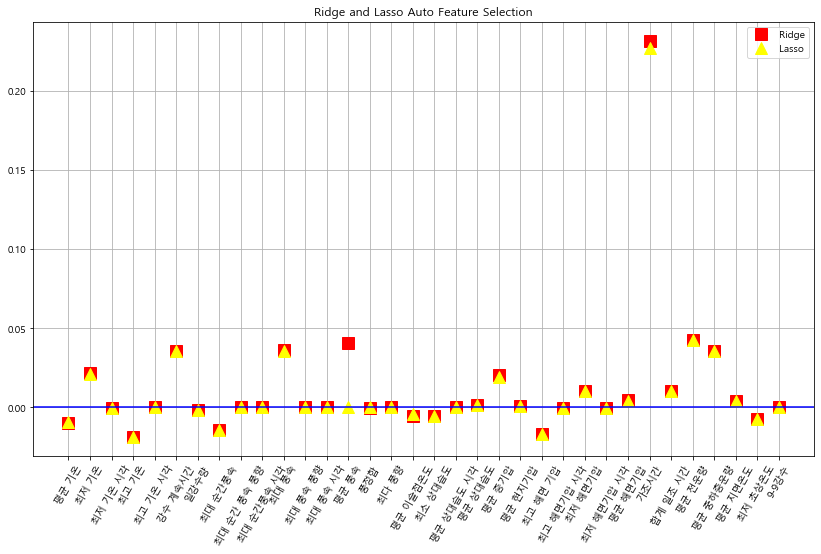

In [9]:
lasso = Lasso(alpha = 0.0001,max_iter = 1000000)
lasso.fit(X_train,y_train)

model = Ridge(alpha=0.0001)
model.fit(X_train, y_train)

plt.figure(figsize=(14,8))
plt.plot(model.coef_,'s',c="red",label="Ridge",markersize=12)
plt.plot(lasso.coef_,'^',c="yellow",label='Lasso',markersize=12)
plt.xticks(range(X_train.shape[1]),category,rotation=60)
plt.axhline(y=0,c="blue")
plt.title("Ridge and Lasso Auto Feature Selection")
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv("./data.txt")
data = data.drop(['stnId','stnNm','tm',"mi10MaxRn","mi10MaxRnHrmt",'hr1MaxRn','hr1MaxRnHrmt',
                  'hr1MaxIcsrHrmt','hr1MaxIcsr','sumDpthFhsc',"sumGsr","ddMefs","ddMefsHrmt","ddMes","ddMesHrmt",
                 'avgCm5Te',"avgCm10Te","avgCm20Te","avgCm30Te","avgM05Te","avgM10Te","avgM15Te",
                  "avgM30Te","avgM50Te","sumLrgEv","sumSmlEv",'sumFogDur'],axis=1)
data["iscs"] = data["iscs"].fillna(0)
data["iscs"].where(data["iscs"]==0,other=1,inplace=True)
data["sumRnDur"] = data["sumRnDur"].fillna(0)
data["sumRn"] = data["sumRn"].fillna(0)
data["avgLmac"] = data["avgLmac"].fillna(0)
data["n99Rn"] = data["n99Rn"].fillna(0)
data["avgTca"] = data["avgTca"].fillna(0)
data = data.dropna(axis=0)
y = data["iscs"]
X = data[["avgTa","sumRn","avgWs","avgRhm","avgTd","avgPa"]]
scaler = StandardScaler()
scaler.fit(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
svm_model = SVC(gamma='auto')
svm_model.fit(X_train,y_train)
print(svm_model.score(X_train,y_train))
print(svm_model.score(X_test,y_test))

In [ ]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

In [ ]:
label = np.array(["Lasso","Ridge","SVM","RandomForest"])
train_score = np.array([0.5294339598294424,0.5294450787865974,0.8125838475986048,0.7109381987299884])
test_score = np.array([0.5230139813320489,0.5229966403274311,0.7289556643638071,0.7122543430142867])
train_score = train_score * 100
test_score = test_score * 100
trace1 = go.Bar(x=label, y=train_score, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='train_score')
trace2 = go.Bar(x=label, y=test_score, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='test_score')
# Plot!
f = go.FigureWidget()
f.add_traces([trace1, trace2])
f.layout.update({'title': 'Score of Scaled and Selected Features'})
f.show()

In [10]:
data = pd.read_csv("./data.txt")
data = data.drop(['stnId','stnNm','tm',"mi10MaxRn","mi10MaxRnHrmt",'hr1MaxRn','hr1MaxRnHrmt',
                  'hr1MaxIcsrHrmt','hr1MaxIcsr','sumDpthFhsc',"sumGsr","ddMefs","ddMefsHrmt","ddMes","ddMesHrmt",
                 'avgCm5Te',"avgCm10Te","avgCm20Te","avgCm30Te","avgM05Te","avgM10Te","avgM15Te",
                  "avgM30Te","avgM50Te","sumLrgEv","sumSmlEv",'sumFogDur'],axis=1)
data["iscs"] = data["iscs"].fillna(0)
data["iscs"].where(data["iscs"]==0,other=1,inplace=True)
data["sumRnDur"] = data["sumRnDur"].fillna(0)
data["sumRn"] = data["sumRn"].fillna(0)
data["avgLmac"] = data["avgLmac"].fillna(0)
data["n99Rn"] = data["n99Rn"].fillna(0)
data["avgTca"] = data["avgTca"].fillna(0)
data = data.dropna(axis=0)
y = data["iscs"]
X = data.drop(['iscs'],axis=1)
scaler = StandardScaler()
scaler.fit(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
label = np.array(["SVM","RandomForest"])
train_score = np.array([1.0,0.8518916018245237])
test_score = np.array([0.7122543430142867,0.849956402173184])
train_score = train_score * 100
test_score = test_score * 100
trace1 = go.Bar(x=label, y=train_score, xaxis='x2', yaxis='y2',
                marker=dict(color='#ffdab9'),
                name='train_score')
trace2 = go.Bar(x=label, y=test_score, xaxis='x2', yaxis='y2',
                marker=dict(color='#eee8aa'),
                name='test_score')
# Plot!
f = go.FigureWidget()
f.add_traces([trace1, trace2])
f.layout.update({'title': 'Score of SVM and RandomForest without Feature Selection'})
f.show()

In [ ]:
train_score = []
test_score = []
for i in range(2,17):
    model = RandomForestClassifier(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))
train_score = np.array(train_score)
test_score = np.array(test_score)
train_score = train_score * 100
test_score = test_score * 100
label = ["2",'3','4',"5",'6','7','8','9','10',"11",'12',"13",'14','15',"16"]
fig = go.Figure()
fig.add_trace(go.Scatter(x=label, y=train_score,
                    mode='lines+markers',
                    name='train_score'))
fig.add_trace(go.Scatter(x=label, y=test_score,
                    mode='lines+markers',
                    name='test_score'))

fig.layout.update({'title': 'Difference of RandomForest\'s Depth'})
fig.show()

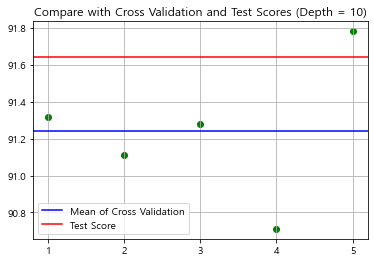

In [11]:
model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)
score2 = model.score(X_test,y_test)
score2 = np.array(score2)
score2 = score2 * 100
score1 = cross_val_score(model,X_test,y_test)
score1 = np.array(score1)
score1 = score1 * 100
x = ["1","2","3","4","5"]
flg = plt.figure()
chart = flg.add_subplot(1, 1, 1)
chart.scatter(x,score1,c="green")
chart.axhline(y=score1.mean(),c="blue",label="Mean of Cross Validation")
chart.axhline(y=score2,c="red",label="Test Score")
plt.title("Compare with Cross Validation and Test Scores (Depth = 10)")
plt.legend()
plt.show()

In [21]:
data = pd.read_csv("./data1.txt")
data = data.drop(['stnId','stnNm','tm',"mi10MaxRn","mi10MaxRnHrmt",'hr1MaxRn','hr1MaxRnHrmt',
                  'hr1MaxIcsrHrmt','hr1MaxIcsr','sumDpthFhsc',"sumGsr","ddMefs","ddMefsHrmt","ddMes","ddMesHrmt",
                 'avgCm5Te',"avgCm10Te","avgCm20Te","avgCm30Te","avgM05Te","avgM10Te","avgM15Te",
                  "avgM30Te","avgM50Te","sumLrgEv","sumSmlEv",'sumFogDur'],axis=1)
data["iscs"] = data["iscs"].fillna(0)
data["iscs"].where(data["iscs"]==0,other=1,inplace=True)
data["sumRnDur"] = data["sumRnDur"].fillna(0)
data["sumRn"] = data["sumRn"].fillna(0)
data["avgLmac"] = data["avgLmac"].fillna(0)
data["n99Rn"] = data["n99Rn"].fillna(0)
data["avgTca"] = data["avgTca"].fillna(0)
data = data.dropna(axis=0)
y = data["iscs"]
X = data.drop(['iscs'],axis=1)
y = list(y)
y_predict = model.predict(X)

In [29]:
print("예상:",list(y_predict),"\n정답:",y)
print(y_predict.sum())
print(len(y))

예상: [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
정답: [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
23
36


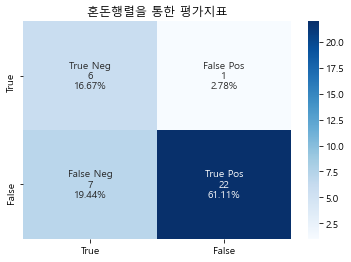

In [50]:
cf_matrix = confusion_matrix(y, y_predict)
a = ["True","False"]
df_matrix = DataFrame(cf_matrix,index = [i for i in a],
                     columns = [i for i in a])
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(df_matrix, annot=labels, fmt="", cmap='Blues')
plt.title("혼돈행렬을 통한 평가지표")
plt.show()